In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

train_dir = '/content/drive/MyDrive/Dataset_RNN/Twitter Dataset/train.csv'

test_dir = '/content/drive/MyDrive/Dataset_RNN/Twitter Dataset/test.csv'

In [ ]:
import pandas as pd

train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
import nltk
import re
import unicodedata

In [ ]:
# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove any empty rows
train_data = train_data.dropna()
test_data = test_data.dropna()

In [ ]:
# Remove any duplicate tweets
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
from sklearn.model_selection import train_test_split
# define X and y
X = train_data['tweet']
y = train_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (25569,)
Shape of y_train :  (25569,)
Shape of X_test :  (6393,)
Shape of y_test :  (6393,)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
# Convert the text data into numerical vectors
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Prepare the training and test data
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
 # Convert the data into 3D tensor
X_train_pad = X_train_pad.reshape((X_train_pad.shape[0], X_train_pad.shape[1], 1))
X_test_pad = X_test_pad.reshape((X_test_pad.shape[0], X_test_pad.shape[1], 1))

In [ ]:
def build_model(input_dim, output_dim, input_length):


    # Define your RNN model
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
    model.add(LSTM(units=64))
    model.add(Dense(units=2, activation='softmax'))

    # Compile your RNN model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





    return model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 353,154
Trainable params: 353,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the model
model = build_model(input_dim=5000, output_dim=64, input_length=100)

history = model.fit(X_train_pad, y_train_cat, validation_data=(X_test_pad, y_test_cat), epochs=15, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_cat, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/15
400/400 [==============================] - 22s 49ms/step - loss: 0.1838 - accuracy: 0.9430 - val_loss: 0.1278 - val_accuracy: 0.9568
Epoch 2/15
400/400 [==============================] - 6s 15ms/step - loss: 0.0899 - accuracy: 0.9680 - val_loss: 0.1250 - val_accuracy: 0.9581
Epoch 3/15
400/400 [==============================] - 5s 12ms/step - loss: 0.0692 - accuracy: 0.9758 - val_loss: 0.1361 - val_accuracy: 0.9567
Epoch 4/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0566 - accuracy: 0.9798 - val_loss: 0.1585 - val_accuracy: 0.9548
Epoch 5/15
400/400 [==============================] - 5s 14ms/step - loss: 0.0466 - accuracy: 0.9834 - val_loss: 0.1686 - val_accuracy: 0.9509
Epoch 6/15
400/400 [==============================] - 4s 9ms/step - loss: 0.0365 - accuracy: 0.9878 - val_loss: 0.1850 - val_accuracy: 0.9504
Epoch 7/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.2134 - val_accuracy: 0.9507

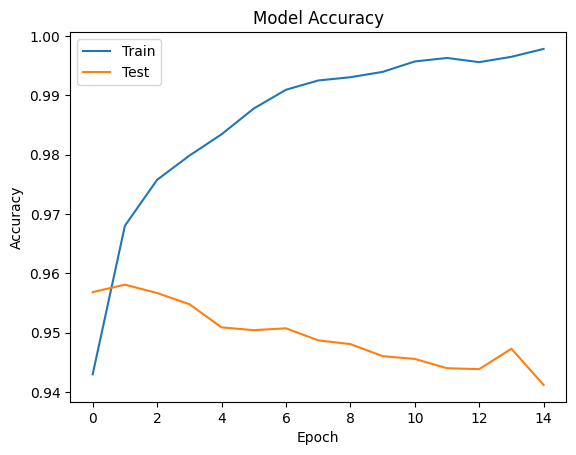

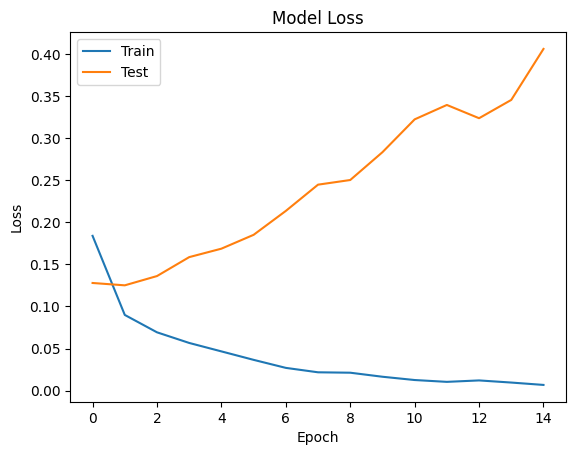

In [ ]:
import matplotlib.pyplot as plt


# Plot the train and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Convert the test data to numerical data
X_test = test_data['cleaned_tweet']
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

In [ ]:
# Reshape the test data
X_test_pad = X_test_pad.reshape((X_test_pad.shape[0], X_test_pad.shape[1], 1))

In [ ]:
import numpy as np

In [ ]:
# Predict labels for test data
y_pred = model.predict(X_test_pad)
y_pred_labels = np.argmax(y_pred, axis=1)

538/538 [==============================] - 2s 3ms/step


In [ ]:
# Add predicted labels to test data
test_data['label'] = y_pred_labels

In [ ]:
test_data.head()

,id,tweet,cleaned_tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone see new birds...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal acne altwaystoheal healthy healing,0
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservations already yes ...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amazing hilarious nephew eli ahmir ...,0
